In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
#df1 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')
#df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#df1.to_csv('marketable.csv')

In [22]:
df1 = pd.read_csv('marketable.csv')
df1.head()

,Unnamed: 0,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.7,4.540098,NaN,NaN
1,1,AGO,8.000000,1.0,5.363637,7.770645,3.0,3.0,0.0,1.0,280.0,5.634790,-3.411248,1.0
2,2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ARG,60.000004,1.0,6.386363,9.133459,1.0,6.0,3.0,3.0,68.9,4.232656,-0.872274,1.0
4,4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* log GDP per capita, PPP, in 1995
**summ logpgp95**

* log output per worker in 1988
**summ loghjypl**

* Average protection against expropriation risk, 1985-1995
**summ avexpr**

* Constraint on executive, 1900
**summ cons00a**

* Constraint on executive in first year of independence
**summ cons1**

* Democracy in 1900
**summ democ00a**

* European settlement in 1900
**summ euro1900**

* Log European settler mortality
**summ logem4**

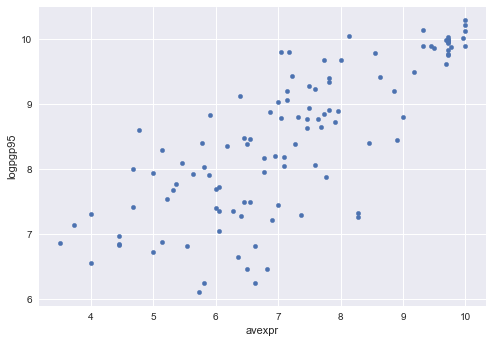

In [8]:
plt.style.use('seaborn')
df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

In [23]:
df1['const'] = 1

reg = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr', 'logem4', 'cons00a']],
      missing='drop')

In [24]:
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     35.88
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           3.70e-13
Time:                        12:02:24   Log-Likelihood:                -52.600
No. Observations:                  61   AIC:                             113.2
Df Residuals:                      57   BIC:                             121.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1728      0.624     11.504      0.0

From our results, we see that

The intercept, $\beta_0$ = 7.1728. 

The slope of `avexpr` $\beta_1$ = 0.3481.

The positive $\beta_1$ parameter estimate implies tha  average protection against expropriation risk has a positive effect on economic outcomes. 1 unit increase in this variable leads to an increase of 0.3481 in economic growth.

The slope of `logem4` $\beta_2$ = -0.3065.

The slope of `cons00a` $\beta_3$ = 0.0156 .



 


The R-squared value of 0.636 indicates that around 63% of variation in log GDP per capita is explained by protection against expropriation.

Using our parameter estimates, we can now write our estimated relationship as:

$\hat{logpgp95}$ = 7.1728 + 0.3481 `avexpr` - 0.3065*`logem4` + 0.0156* `cons00a`

